#02. Neural Network Classification with TensorFlow
Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

  * Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
  * Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
  * Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

# Working with a larger example (Multiclass classification)

When you have more than to classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classess, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the data has already been sorted into training and test sets for us.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

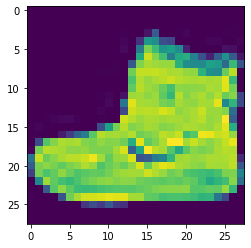

In [5]:
# plot a single image
plt.imshow(train_data[0])

In [6]:
# Check out sample label
train_labels[9]

5

In [7]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

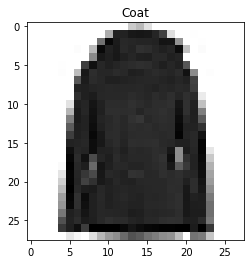

In [8]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

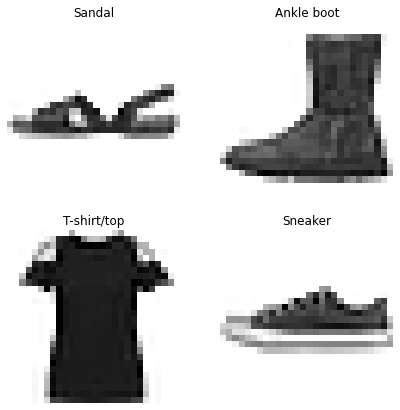

In [9]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class Classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded use CategoricalCrossentropy()
  * If your labels are integer for use SparseCategoricalCrossentropy()
* Output layer activation = Softmax(not sigmoid)


In [10]:
# Our data needs to be flattened (from 28*28 to (None, 784))
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [11]:
# Set random seed
tf.random.set_seed(42)
INPUT_SHAPE = (28,28)
# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = INPUT_SHAPE),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data, train_labels, # train_labels => tf.one_hot(train_labels, depth=10)
                                epochs=10,
                                validation_data=(test_data, test_labels)) # test_labels => tf.one_hot(test_labels, depth=10)



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4334 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2997 - accuracy: 0.0999 - val_loss: 2.2829 - val_accuracy: 0.1096
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2385 - accuracy: 0.1288 - val_loss: 2.2091 - val_accuracy: 0.1392
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0972 - accuracy: 0.1702 - val_loss: 1.9114 - val_accuracy:

In [12]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Scaled (or Normalized)

In [13]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [14]:
# We cam get our training and test data between 0 and 1 by dividing by the maximum.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of scaled training data.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Now our data is normalized, let's build a model to find patterns in it.

# Set random seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit model
norm_history=model_12.fit(train_data_norm,
                          tf.one_hot(train_labels, depth=10),
                          epochs=10,
                          validation_data= (test_data_norm, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1576 - accuracy: 0.5800 - val_loss: 0.7845 - val_accuracy: 0.7203
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6822 - accuracy: 0.7546 - val_loss: 0.6545 - val_accuracy: 0.7760
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5965 - accuracy: 0.7924 - val_loss: 0.6101 - val_accuracy: 0.7832
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5609 - accuracy: 0.8032 - val_loss: 0.5803 - val_accuracy: 0.7992
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5435 - accuracy: 0.8075 - val_loss: 0.5835 - val_accuracy: 0.8014
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5300 - accuracy: 0.8120 - val_loss: 0.5729 - val_accuracy: 0.7978
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5205 - accuracy: 0.8137 - val_loss: 0.5644 - val_accuracy:

🔑 **Notes:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (number between 0 & 1)

<Axes: title={'center': 'Normalized Data'}>

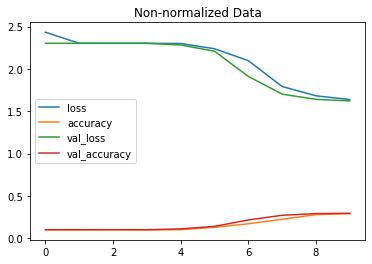

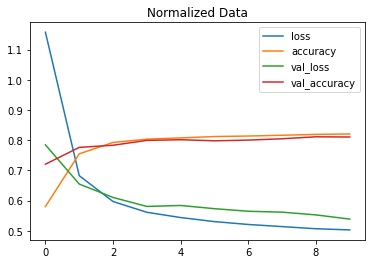

In [16]:
# Plot Non-normalized data loss curvers
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

> 🔑 **Note:** the same model with even **slightly** different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture 

## Finding the ideal learning rate

In [17]:
# set random seed
tf.random.set_seed(42)

model_13 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile model
model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**epoch/20)

#Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])




Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1430 - accuracy: 0.1961 - val_loss: 51.7821 - val_accuracy: 0.1965 - lr: 5.0000e-05
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6693 - accuracy: 0.3724 - val_loss: 47.7070 - val_accuracy: 0.4042 - lr: 5.0000e-04
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9796 - accuracy: 0.6226 - val_loss: 77.6372 - val_accuracy: 0.5702 - lr: 0.0050
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9987 - accuracy: 0.6010 - val_loss: 199.6834 - val_accuracy: 0.3792 - lr: 0.0500
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3836 - accuracy: 0.1008 - val_loss: 2.3431 - val_accuracy: 0.1000 - lr: 0.5000
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8394 - accuracy: 0.0963 - val_loss: 3.0040 - val_accuracy: 0.1000 - lr: 5.0000
Epoch 7/40
1875/1875 [=======================

Text(0.5, 1.0, 'Finding the ideal learning rate')

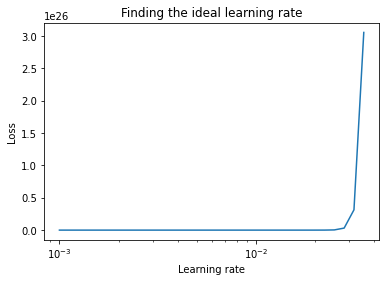

In [18]:
# Plot the learning rate decay curve

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")



In [19]:
#Let's refit a model with the ideal learning rate

#Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=["accuracy"])

# fit model
history_model_14= model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3443 - accuracy: 0.4882 - val_loss: 0.9038 - val_accuracy: 0.6576
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8029 - accuracy: 0.6813 - val_loss: 0.7724 - val_accuracy: 0.6889
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7278 - accuracy: 0.7018 - val_loss: 0.7240 - val_accuracy: 0.7021
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6795 - accuracy: 0.7441 - val_loss: 0.6829 - val_accuracy: 0.7409
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6442 - accuracy: 0.7567 - val_loss: 0.6834 - val_accuracy: 0.7440
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6194 - accuracy: 0.7662 - val_loss: 0.6468 - val_accuracy: 0.7635
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6013 - accuracy: 0.7782 - val_loss: 0.6397 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go throught the top 2...

### Create confusion matrix

In [52]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, fig_size=(10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm= cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confustion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=fig_size)
  # Create a matrix plot
  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion matrix",
         xlabel = "Predicted label",
         ylabel = "True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels= labels,
         yticklabels= labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=text_size)


In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Since a confusion matrix compares the truth labels (`test_labels`) to predicted lables, we have to make some predictions with our model.

In [29]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[9.4177834e-12, 9.7777914e-08, 1.9078641e-13, 1.9593429e-09,
        2.4423280e-13, 8.9709252e-02, 9.1514483e-14, 1.2543836e-01,
        1.1103187e-06, 7.8485107e-01],
       [8.9004170e-03, 5.7486314e-08, 9.0678728e-01, 1.7198232e-04,
        1.0795032e-02, 3.0980074e-05, 7.3309109e-02, 1.6283754e-11,
        5.1420193e-06, 1.3449558e-12],
       [9.2264639e-07, 9.9790424e-01, 3.4028361e-08, 1.8574996e-03,
        2.3702561e-04, 1.0378020e-09, 3.2511133e-07, 3.2089320e-10,
        4.4811563e-09, 1.6631880e-14],
       [3.6493316e-06, 9.9573284e-01, 3.3661422e-07, 3.1865893e-03,
        1.0743182e-03, 1.2226061e-08, 2.2097975e-06, 2.4679980e-09,
        3.3484955e-08, 4.0860569e-13],
       [8.0666482e-02, 3.4136428e-07, 3.1361449e-01, 2.4995503e-03,
        2.0282686e-02, 3.0243045e-04, 5.7975239e-01, 1.9021460e-08,
        2.8815984e-03, 1.4431600e-11]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [32]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.4177834e-12, 9.7777914e-08, 1.9078641e-13, 1.9593429e-09,
        2.4423280e-13, 8.9709252e-02, 9.1514483e-14, 1.2543836e-01,
        1.1103187e-06, 7.8485107e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [33]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [36]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [37]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[645,   0,  20,  80,  15,   1, 222,   0,  17,   0],
       [  0, 947,   2,  26,  21,   1,   2,   0,   1,   0],
       [  8,   0, 672,   6, 200,   0, 112,   0,   2,   0],
       [ 39,  11,  10, 795,  64,   0,  74,   0,   7,   0],
       [  0,   1,  88,  15, 830,   0,  60,   0,   6,   0],
       [  0,   0,   0,   0,   2, 872,   1,  76,   6,  43],
       [ 98,   1, 138,  36, 194,   0, 503,   0,  30,   0],
       [  0,   0,   0,   0,   0,  55,   0, 900,   3,  42],
       [  1,   0,   2,   9,  14,   9,  45,   6, 914,   0],
       [  0,   0,   0,   0,   0,  20,   0,  40,   1, 939]])

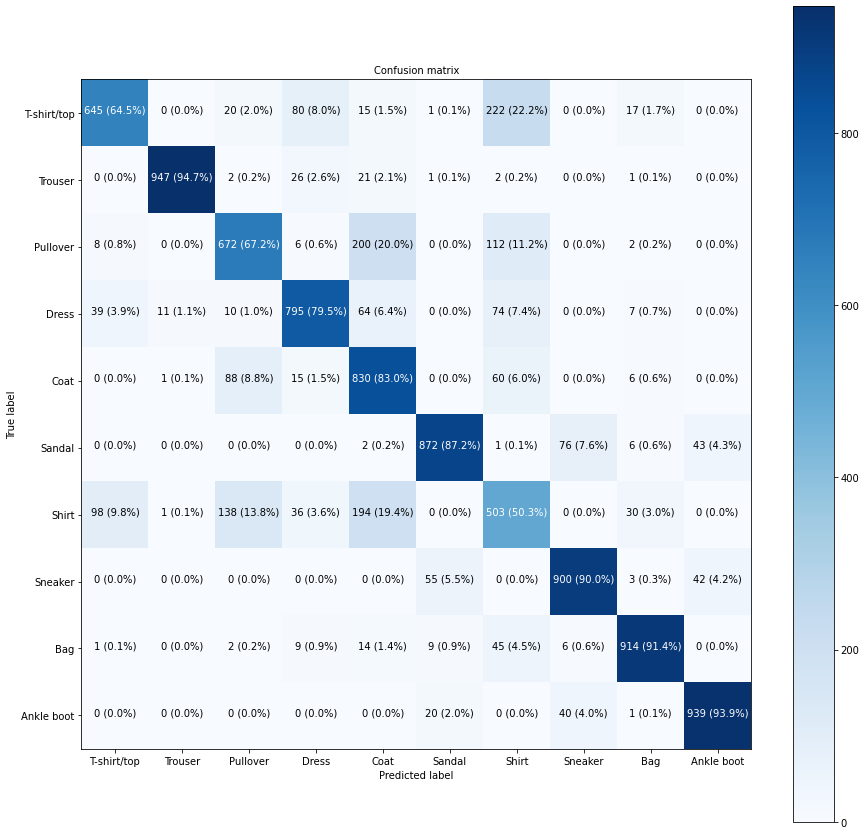

In [53]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      fig_size=(15,15),
                      text_size=10
                      )

The result aren't as good as they could be ...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes. (e.g. predicint `Shirt` when it's actually a `T-shirt/top`).

😕 **Question:** 

* Does it make sense that our model is getting confuse between the `Shirt` and `T-shirt/top` classes?
* Why do you think this might be?
* What one way you could investigate?


> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label.

In [63]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  # i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image= images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap= plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  color = ("green" if pred_label == true_label else "red")

  # Add xlabel information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f} | True: {true_label}", color=color)

1/1 [==============================] - 0s 16ms/step


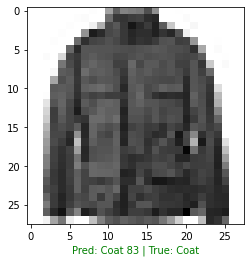

In [66]:
# Check out a random image as well as its prediction
plot_random_image(model= model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes= class_names)

After running the cell above a few times We can get a visual understanding of the relationship between the model's predictions and the true labels.

I figure out which predictions the model get confused on:
It seems to mix up classes which are similar for example: `Sneaker` with `Ankel boot`.

  * Looking at the images, we can se how this might be the case.

  * The overall shape of a `Sneaker` and a `Ankle Boot` are similar

  * The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

In [69]:
# Find the layers of our most recent model
model_14.layers

In [68]:
# Extract a particular layer
model_14.layers[0]


In [76]:
#Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.06831226, -0.71042335,  0.31663394, -0.16607298],
        [-0.49310783,  0.03650945,  0.2192547 , -0.08971139],
        [-0.6476997 , -0.6922435 ,  0.99539864, -0.82659966],
        ...,
        [-0.18880658, -0.3957645 ,  0.6752583 , -0.5942676 ],
        [-0.59818417,  0.40361777, -0.0545355 ,  0.0588488 ],
        [-0.14762074,  0.04672714,  0.3593259 , -0.20743327]],
       dtype=float32), (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is "`glorot_uniform`") and are then updated to better representative values of the data (non-random) by the neural network during training.

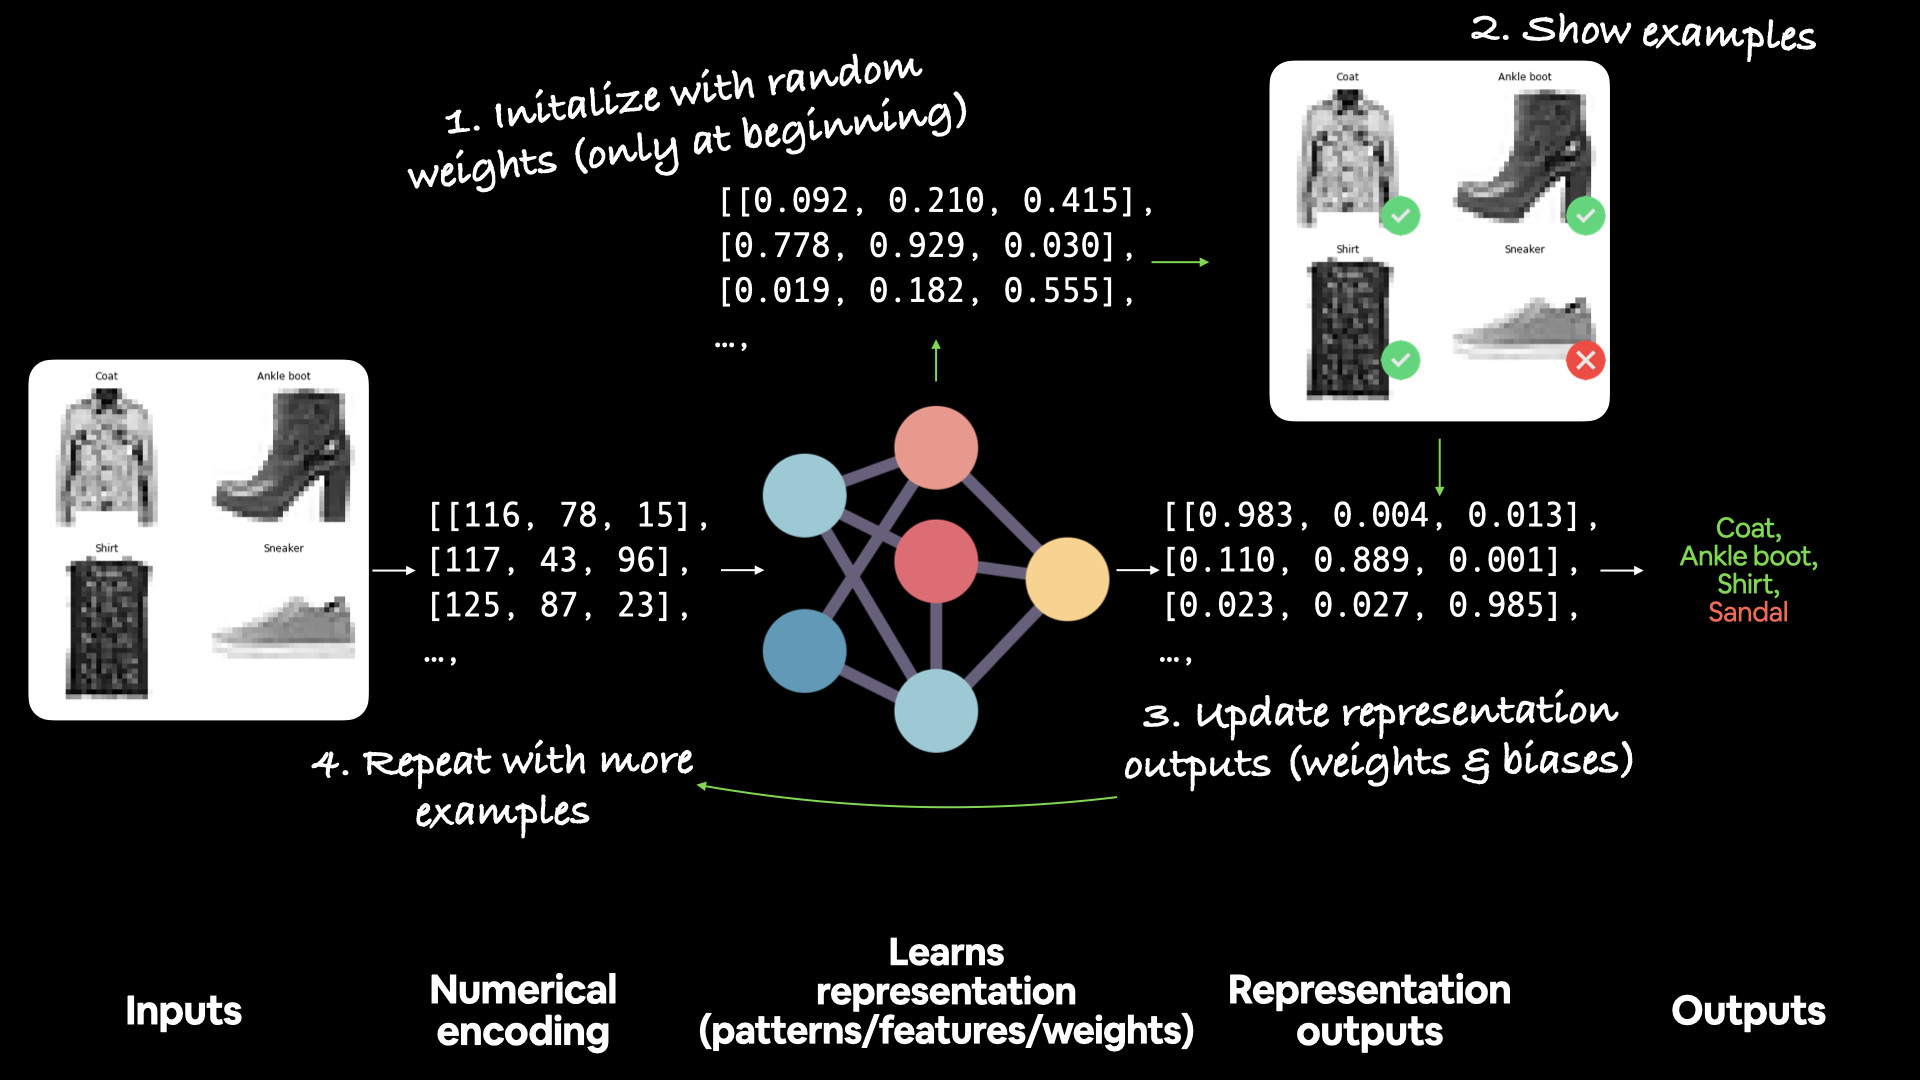

*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Check bias vector

In [75]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-1.9364378,  0.2202824,  2.5758317, -1.4479162,  4.773146 ,
         0.5747796,  1.6347526, -4.2330046, -1.8422445, -4.20293  ],
       dtype=float32), (10,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as ***zeroes*** by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [77]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

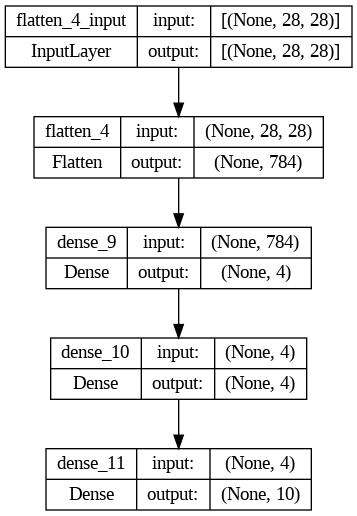

In [78]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs for each layer
plot_model(model_14, show_shapes=True)